In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!gdown 11jL5m9WwF1_hDwCVlDlHYox_1qr2qX_E

Downloading...
From: https://drive.google.com/uc?id=11jL5m9WwF1_hDwCVlDlHYox_1qr2qX_E
To: /kaggle/working/StyTR.zip
100%|██████████████████████████████████████| 14.2M/14.2M [00:00<00:00, 25.5MB/s]


In [3]:
!unzip /kaggle/working/StyTR.zip

Archive:  /kaggle/working/StyTR.zip
   creating: StyTR/
   creating: StyTR/models/
  inflating: StyTR/models/sampler.py  
  inflating: StyTR/models/transformer.py  
  inflating: StyTR/models/ViT_helper.py  
  inflating: StyTR/models/StyTR.py   
   creating: StyTR/models/__pycache__/
  inflating: StyTR/models/__pycache__/ViT_helper.cpython-311.pyc  
  inflating: StyTR/models/__pycache__/StyTR.cpython-311.pyc  
  inflating: StyTR/models/__pycache__/transformer.cpython-311.pyc  
  inflating: StyTR/function.py       
  inflating: StyTR/sampler.py        
   creating: StyTR/util/
  inflating: StyTR/util/utils.py     
  inflating: StyTR/util/box_ops.py   
  inflating: StyTR/util/__init__.py  
  inflating: StyTR/util/plot_utils.py  
  inflating: StyTR/util/misc.py      
   creating: StyTR/util/.ipynb_checkpoints/
   creating: StyTR/util/__pycache__/
  inflating: StyTR/util/__pycache__/box_ops.cpython-311.pyc  
  inflating: StyTR/util/__pycache__/misc.cpython-311.pyc  
  inflating: StyTR/util/

### Download weight for model

In [4]:
!gdown 1BinnwM5AmIcVubr16tPTqxMjUCE8iu5M
!gdown 1C3xzTOWx8dUXXybxZwmjijZN8SrC3e4B
!gdown 1dnobsaLeE889T_LncCkAA2RkqzwsfHYy

Downloading...
From: https://drive.google.com/uc?id=1BinnwM5AmIcVubr16tPTqxMjUCE8iu5M
To: /kaggle/working/vgg_normalised.pth
100%|███████████████████████████████████████| 80.1M/80.1M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3xzTOWx8dUXXybxZwmjijZN8SrC3e4B
To: /kaggle/working/embedding_iter_160000.pth
100%|█████████████████████████████████████████| 396k/396k [00:00<00:00, 107MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1dnobsaLeE889T_LncCkAA2RkqzwsfHYy
From (redirected): https://drive.google.com/uc?id=1dnobsaLeE889T_LncCkAA2RkqzwsfHYy&confirm=t&uuid=3da38917-1257-4b5e-bf4c-0179567608ad
To: /kaggle/working/transformer_iter_160000.pth
100%|█████████████████████████████████████████| 127M/127M [00:00<00:00, 289MB/s]


In [5]:
!mv "/kaggle/working/embedding_iter_160000.pth" "/kaggle/working/StyTR/experiments"
!mv "/kaggle/working/transformer_iter_160000.pth" "/kaggle/working/StyTR/experiments"
!mv "/kaggle/working/vgg_normalised.pth" "/kaggle/working/StyTR/experiments"

### Download image data

In [6]:
!gdown 1mU--DNhy8pWMTljj7jI3FvJwRYRHwAq5
!gdown 1yt9RDch0ZT9gtTfEBQLFFhGPw3PSOEh0
!gdown 13XpLuVuxI6ekdEf5UElKH_IMWrK8wZU1


Downloading...
From: https://drive.google.com/uc?id=1mU--DNhy8pWMTljj7jI3FvJwRYRHwAq5
To: /kaggle/working/content_img.jpg
100%|███████████████████████████████████████| 1.15M/1.15M [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yt9RDch0ZT9gtTfEBQLFFhGPw3PSOEh0
To: /kaggle/working/style_img.jpg
100%|█████████████████████████████████████████| 517k/517k [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=13XpLuVuxI6ekdEf5UElKH_IMWrK8wZU1
To: /kaggle/working/style_img2.jpg
100%|███████████████████████████████████████| 1.02M/1.02M [00:00<00:00, 124MB/s]


In [7]:
cd /kaggle/working/StyTR

/kaggle/working/StyTR


/kaggle/working/StyTR/util/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg.load_state_dict(torch.load(args.vgg))
/kaggle/working/StyTR/util/utils.py:75: Futur

<class 'int'>


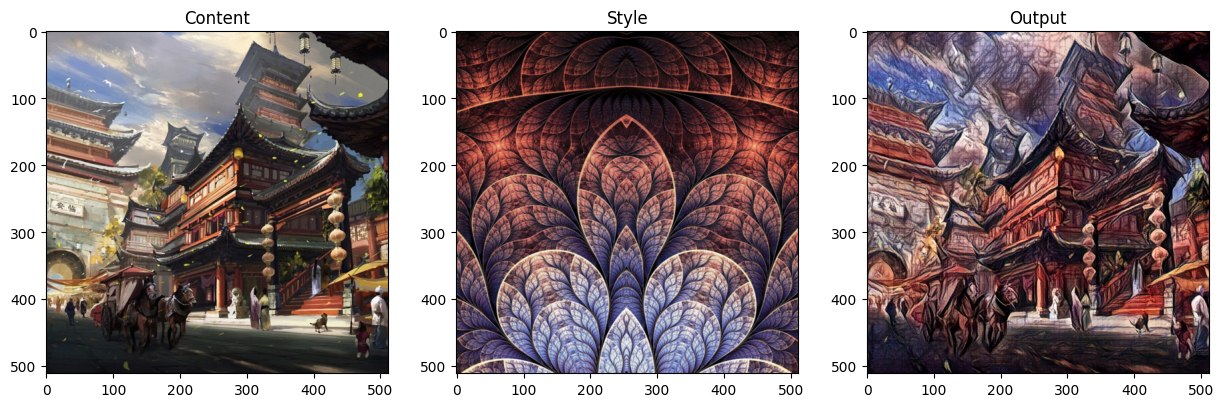

In [8]:
import torch
import matplotlib.pyplot as plt
from StyTR.util.utils import process_images
from StyTR.util.utils import network as StyTR_model
import numpy as np

content_path = "/kaggle/working/content_img.jpg"
style_path = "/kaggle/working/style_img2.jpg"

content, style = process_images(content_path, style_path)

with torch.no_grad():
    output= StyTR_model(content,style)
output = output[0].cpu()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(content.cpu()[0].permute(1, 2, 0))
ax[0].set_title('Content')
ax[1].imshow(style.cpu()[0].permute(1, 2, 0))
ax[1].set_title('Style')
ax[2].imshow(output[0].permute(1, 2, 0))
ax[2].set_title('Output')
plt.show()


